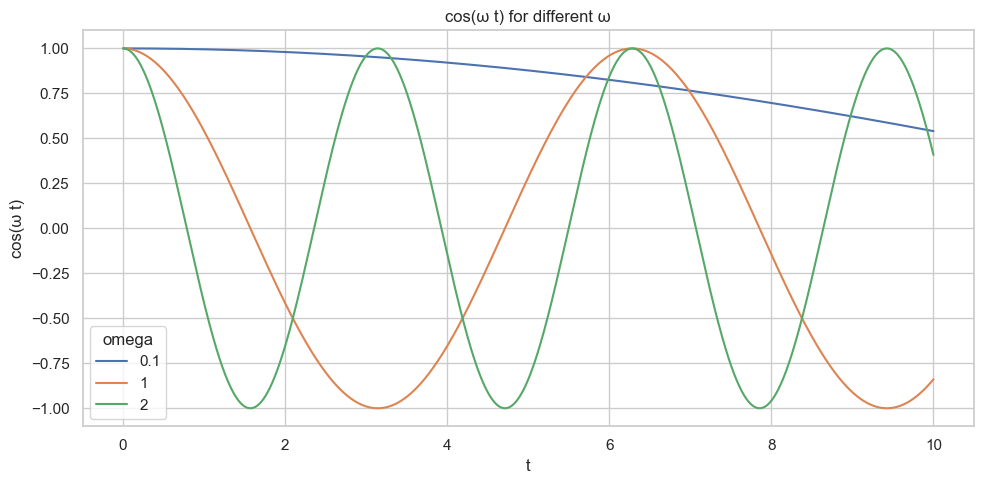

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Prepare data
t = np.linspace(0, 10, 2000)
omegas = [0.1, 1, 2]

data = []
for w in omegas:
    data.append(pd.DataFrame({"t": t, "value": np.cos(w * t), "omega": str(w)}))

df = pd.concat(data)

# Plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="t", y="value", hue="omega")

plt.title("cos(ω t) for different ω")
plt.xlabel("t")
plt.ylabel("cos(ω t)")
plt.tight_layout()
plt.show()


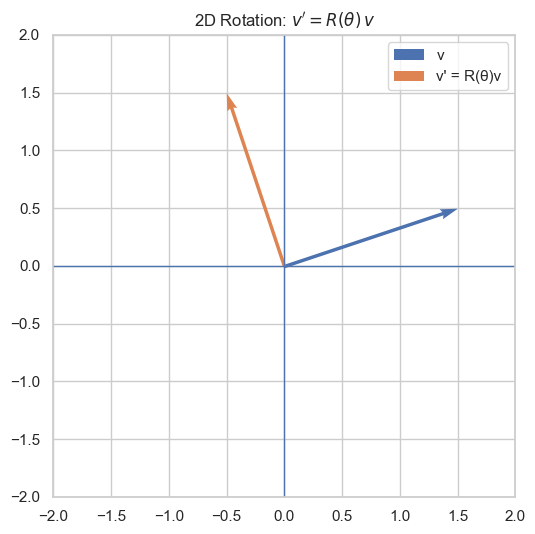

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----- Parameters you can change -----
x, y = 1.5, 0.5  # original vector v = (x, y)
theta = np.pi / 2  # rotation angle in radians (e.g. π/3 = 60°)
# ------------------------------------

# Original vector
v = np.array([x, y])

# Rotation matrix R(θ)
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Rotated vector v' = R(θ) v
v_rot = R @ v

# Plot
plt.figure(figsize=(6, 6))

# Axes
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Plot original vector
plt.quiver(0, 0, v[0], v[1], angles="xy", scale_units="xy", scale=1, color="C0", label="v")

# Plot rotated vector
plt.quiver(0, 0, v_rot[0], v_rot[1], angles="xy", scale_units="xy", scale=1, color="C1", label="v' = R(θ)v")

# Formatting
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal", adjustable="box")
plt.title(r"2D Rotation: $v' = R(\theta)\,v$")
plt.legend()
plt.grid(True)

plt.show()


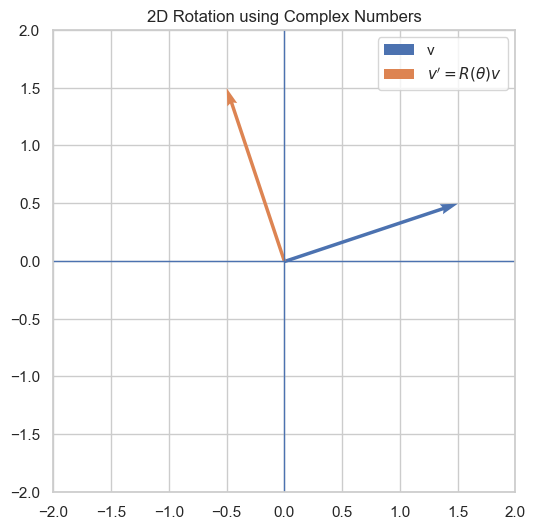

In [ ]:
import torch

v = torch.tensor([1.5, 0.5])  # original vector v = (x, y)
theta = torch.tensor(np.pi / 2)  # rotation angle in radians (e.g

z = torch.view_as_complex(v.view(-1, 2))
rot = torch.exp(1j * theta)  # e^{iθ} j = \sqrt{-1}.

z_rot = rot * z  # rotated complex number
v_rot = torch.view_as_real(z_rot).view(-1)  # rotated vector v' = R(θ) v


plt.figure(figsize=(6, 6))

# Axes
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Plot original vector
plt.quiver(0, 0, v[0].item(), v[1].item(), angles="xy", scale_units="xy", scale=1, color="C0", label="v")

# Plot rotated vector
plt.quiver(
    0,
    0,
    v_rot[0].item(),
    v_rot[1].item(),
    angles="xy",
    scale_units="xy",
    scale=1,
    color="C1",
    label=r"$v' = R(\theta)v$",
)

# Formatting
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal", adjustable="box")
plt.title(r"2D Rotation using Complex Numbers")
plt.legend()
plt.grid(True)

plt.show()

## Sinusoidal_Positional_Encoding

In [ ]:
def sinusoidal_positional_encoding(max_len, d_model):
    pe = torch.zeros(max_len, d_model)

    positions = torch.arange(0, max_len).unsqueeze(-1)  #  shape (max_len, 1)
    div_terms = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))  # shape (d_model/2,)

    pe[:, 0::2] = torch.sin(positions * div_terms)  # even indices
    pe[:, 1::2] = torch.cos(positions * div_terms)  # odd indices
    return pe

In [19]:
max_len = 100
d_model = 512
pe = sinusoidal_positional_encoding(max_len, d_model)
print(pe.shape)  # torch.Size([100, 512])

torch.Size([100, 512])


In [ ]:
import torch
import torch.nn as nn


class LearnedPositionEncoding(nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()
        self.position_embeddings = nn.Embedding(max_len, d_model)

    def forward(self, positions):
        return self.position_embeddings(positions)

In [5]:
max_len = 100
d_model = 512
learned_pe = LearnedPositionEncoding(max_len, d_model)
pe = learned_pe(torch.arange(0, max_len).unsqueeze(0).repeat(8, 1))
print(pe.shape)  # torch.Size([800, 512])

torch.Size([8, 100, 512])


In [ ]:
import torch

embed_dim = 512
grid_size = 16

In [27]:
grid_h = torch.arange(grid_size)
grid_w = torch.arange(grid_size)

In [28]:
grid = torch.meshgrid(grid_w, grid_h, indexing="ij")  # shape (2, grid_size, grid_size)

In [29]:
grid = torch.stack(grid, dim=0)  # shape (2, grid_size, grid_size)

In [32]:
grid = grid.reshape(2, -1).transpose(0, 1)  # shape (grid_size*grid_size, 2)

In [34]:
grid = grid.transpose(0, 1)  # shape (2, grid_size*grid_size)

In [35]:
grid.shape

torch.Size([2, 256])

In [ ]:
grid = grid.reshape([2, grid_size, grid_size])  # shape (2, 1, grid_size, grid_size)

In [ ]:
grid.shape

torch.Size([2, 1, 16, 16])

In [22]:
grid

tensor([[[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
          [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
          [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
          [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
          [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
          [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
          [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
          [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
          [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
          [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
          [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
          [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
          [1

In [23]:
grid[0].shape

torch.Size([1, 16, 16])

In [24]:
x = torch.tensor([0, 1, 2])
y = torch.tensor([10, 20])
X, Y = torch.meshgrid(x, y, indexing="ij")

In [26]:
X.shape

torch.Size([3, 2])

In [ ]:
import torch
import torch.nn as nn


class PosED(nn.Module):
    def __init__(self, embed_dim, gird_zie):
        super().__init__()

        self.embed_dim = embed_dim
        self.grid_size = grid_size

        self.pos_embed = self.build_2d_sincos_pos_embed(
            self.embed_dim, self.grid_size, cls_token=False, extra_tokens=0
        )

    def build_2d_sincos_pos_embed(self, embed_dim, grid_size, cls_token, extra_tokens):
        # --- 1. build 2D grid ---
        h = torch.arange(grid_size, dtype=torch.float32)
        w = torch.arange(grid_size, dtype=torch.float32)
        w_grid, h_grid = torch.meshgrid(w, h, indexing="ij")  # match original numpy ordering: w first
        grid = torch.stack([w_grid, h_grid], dim=0)  # (2, H, W)

        # reshape to (2, H*W)
        grid = grid.reshape(2, -1)

        # --- 2. build 2D sin-cos embeddings ---
        emb_h = self.build_1d_sincos(embed_dim // 2, grid[0])
        emb_w = self.build_1d_sincos(embed_dim // 2, grid[1])
        pos_embed = torch.cat([emb_h, emb_w], dim=1)  # (H*W, D)

        # prepend extra tokens (e.g., cls token)
        if cls_token and extra_tokens > 0:
            extra = torch.zeros(extra_tokens, embed_dim)
            pos_embed = torch.cat([extra, pos_embed], dim=0)

        return pos_embed

    def build_1d_sincos(self, embed_dim, pos):
        """
        embed_dim: D/2
        pos: (M,)
        returns: (M, D/2)
        """
        assert embed_dim % 2 == 0

        omega = torch.arange(embed_dim // 2, dtype=torch.float32)
        omega = omega / (embed_dim / 2.0)
        omega = 1.0 / (10000**omega)

        # outer product
        out = pos[:, None] * omega[None, :]  # (M, D/2)

        emb = torch.cat([torch.sin(out), torch.cos(out)], dim=1)
        return emb

    def forward(self):
        return self.pos_embed

# RoPE

In [1]:
import torch
import torch.nn as nn
from einops import rearrange

In [2]:
x1 = torch.tensor([[1, 2, 3], [4, 5, 6]])  # shape (2, 3)
x2 = torch.tensor([[1, 2, 3], [4, 5, 6]])  # shape (2, 3)


In [3]:
x3 = torch.repeat_interleave(x1, repeats=2, dim=-1)
x3

tensor([[1, 1, 2, 2, 3, 3],
        [4, 4, 5, 5, 6, 6]])

In [4]:
x4 = torch.stack([x1, x1], dim=-1)
x4

tensor([[[1, 1],
         [2, 2],
         [3, 3]],

        [[4, 4],
         [5, 5],
         [6, 6]]])

In [5]:
x4.shape

torch.Size([2, 3, 2])

In [6]:
x4.flatten(1)

tensor([[1, 1, 2, 2, 3, 3],
        [4, 4, 5, 5, 6, 6]])

### Complex Number Implementation

In [ ]:
import torch


def get_inv_freq(embed_dim: int, base: float = 10000.0):
    """
    和 complex 版本的 inv_freq 完全一样：
    inv_freq[j] = 1 / base^( (2j) / embed_dim )
    j = 0, 1, ..., embed_dim/2-1
    """
    inv_freq = 1.0 / (base ** (torch.arange(0, embed_dim, 2).float() / embed_dim))
    return inv_freq  # shape: (embed_dim // 2,)


def get_rotary_pos_emb(seq_len: int, inv_freq: torch.Tensor):
    """
    生成和 complex 版本中 freqs_cis 对应的 sin/cos。
    - positions: (T,)
    - angles:    (T, D/2)
    - sin, cos:  (T, D)    每对 (even, odd) 共享同一个角度
    """
    device = inv_freq.device
    dtype = inv_freq.dtype

    # positions: [0, 1, ..., seq_len-1]
    positions = torch.arange(seq_len, dtype=dtype, device=device)  # (T,)

    # angles[pos, j] = positions[pos] * inv_freq[j]
    # 形状 (T, D/2)，和 complex 版的 freqs 完全一样
    #
    angles = positions.outer(inv_freq)  # (T, D/2)

    # 先算 sin/cos(angles)，还是 (T, D/2)
    sin = angles.sin()
    cos = angles.cos()

    # 为了和 real 版公式 q * cos + rotate_half(q) * sin 对齐，
    # 需要把每个角度复制到一对维度上： (T, D/2) -> (T, D)
    sin = torch.repeat_interleave(sin, 2, dim=-1)  # (T, D)
    cos = torch.repeat_interleave(cos, 2, dim=-1)  # (T, D)

    return sin, cos


def rotate_half(x):
    x = rearrange(x, "... (d r) -> ... d r", r=2)
    x1, x2 = x.unbind(dim=-1)
    x = torch.stack((-x2, x1), dim=-1)
    return rearrange(x, "... d r -> ... (d r)")


def apply_rotary_pos_emb(q: torch.Tensor, k: torch.Tensor, sin: torch.Tensor, cos: torch.Tensor):
    """
    实数版 RoPE：
    - q, k: (B, T, H, D)
    - sin, cos: (T, D)，与 complex 版的角度一一对应
    返回的 q_embed, k_embed 与 complex 版 q_rot, k_rot allclose
    """
    orig_dtype = q.dtype

    # 和 complex 版一样，先用 float32 计算，最后 cast 回来
    q = q.float()
    k = k.float()

    sin = sin.to(q.device, q.dtype)  # (T, D)
    cos = cos.to(q.device, q.dtype)

    # 在 seq 维上对齐后，利用广播扩展到 (B, T, H, D)
    # sin, cos: (T, 1, D) 视作 (1, T, 1, D)，
    # 与 q: (B, T, H, D) 自动广播
    cos = cos.unsqueeze(1)  # (T, 1, D)
    sin = sin.unsqueeze(1)  # (T, 1, D)

    q_embed = (q * cos) + (rotate_half(q) * sin)
    k_embed = (k * cos) + (rotate_half(k) * sin)

    return q_embed.to(orig_dtype), k_embed.to(orig_dtype)


In [23]:
def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    inv_freq = 1.0 / (theta ** (torch.arange(0, dim, 2).float() / dim))
    positions = torch.arange(end, dtype=torch.float32)
    freqs = torch.einsum("i , j -> i j", positions, inv_freq)  # (end, dim/2)
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # (end, dim/2) complex
    return freqs_cis


def reshape_for_broadcast(freqs_cis: torch.Tensor, x: torch.Tensor):
    ndim = x.ndim
    assert freqs_cis.shape == (x.shape[1], x.shape[-1])
    shape = [d if i == 1 or i == ndim - 1 else 1 for i, d in enumerate(x.shape)]
    return freqs_cis.view(*shape)


def apply_rotary_emb_complex(
    xq: torch.Tensor,
    xk: torch.Tensor,
    freqs_cis: torch.Tensor,
):
    xq_ = torch.view_as_complex(xq.float().reshape(*xq.shape[:-1], -1, 2))
    xk_ = torch.view_as_complex(xk.float().reshape(*xk.shape[:-1], -1, 2))
    freqs_cis = reshape_for_broadcast(freqs_cis, xq_)
    xq_out = torch.view_as_real(xq_ * freqs_cis).flatten(3)
    xk_out = torch.view_as_real(xk_ * freqs_cis).flatten(3)
    return xq_out.type_as(xq), xk_out.type_as(xk)


In [24]:
B, T, H, D = 2, 16, 4, 64

q = torch.randn(B, T, H, D, dtype=torch.float16)
k = torch.randn(B, T, H, D, dtype=torch.float16)

# complex 版本
freqs_cis = precompute_freqs_cis(D, T)  # (T, D/2)
q_rot, k_rot = apply_rotary_emb_complex(q, k, freqs_cis)

# real 版本
inv_freq = get_inv_freq(D)
sin, cos = get_rotary_pos_emb(T, inv_freq)
q_rot2, k_rot2 = apply_rotary_pos_emb(q, k, sin, cos)

assert torch.allclose(q_rot, q_rot2, atol=1e-6, rtol=1e-6)
assert torch.allclose(k_rot, k_rot2, atol=1e-6, rtol=1e-6)

## 2D RoPE 

In [26]:
B = 8
heads = 8
embed_dim = 512
image_size = 224
patch_size = 16
img_tokens = (image_size // patch_size) ** 2

q = torch.randn(B, img_tokens, heads, embed_dim)
k = torch.randn(B, img_tokens, heads, embed_dim)

h, w = image_size // patch_size, image_size // patch_size


def get_2d_rotary_pos_emb(h, w, embed_dim):
    # The step size is 1 for both height and width not 2
    inv_freq = 1.0 / (10000 ** (torch.arange(0, embed_dim // 2, 2).float() / (embed_dim // 2)))

    sin_w, cos_w = get_rotary_pos_emb(w, inv_freq)
    sin_h, cos_h = get_rotary_pos_emb(h, inv_freq)

    # Expand to 2D grid
    sin_w = sin_w.unsqueeze(0).repeat(h, 1, 1)  # shape (h, w, embed_dim/4)
    cos_w = cos_w.unsqueeze(0).repeat(h, 1, 1)

    sin_h = sin_h.unsqueeze(1).repeat(1, w, 1)  # shape (h, w, embed_dim/4)
    cos_h = cos_h.unsqueeze(1).repeat(1, w, 1)

    # Concatenate along the last dimension
    print(sin_w.shape, sin_h.shape)
    sin = torch.cat([sin_w, sin_h], dim=-1)  # shape (h, w, embed_dim/2)
    cos = torch.cat([cos_w, cos_h], dim=-1)

    # Reshape to (h*w, embed_dim/2)
    sin = sin.reshape(-1, embed_dim)
    cos = cos.reshape(-1, embed_dim)

    return sin, cos


sin_2d, cos_2d = get_2d_rotary_pos_emb(h, w, embed_dim)
q_rot_2d, k_rot_2d = apply_rotary_pos_emb(q, k, sin_2d, cos_2d)

torch.Size([14, 14, 256]) torch.Size([14, 14, 256])


In [ ]:
# B = 8
# heads = 8
# embed_dim = 512  # head_dim
# image_size = 224
# patch_size = 16
# img_tokens = (image_size // patch_size) ** 2

import torch

# ========= 1. Generic 1D RoPE helpers (real) =========


def get_rotary_pos_emb(seq_len: int, inv_freq: torch.Tensor):
    """
    Given:
      - seq_len: length T
      - inv_freq: shape (n_freq,)
    Compute:
      - angles: (T, n_freq)
      - sin, cos: (T, 2*n_freq), where each freq is duplicated for (even, odd) pairing.
    """
    device = inv_freq.device
    dtype = inv_freq.dtype

    positions = torch.arange(seq_len, device=device, dtype=dtype)  # (T,)
    angles = positions[:, None] * inv_freq[None, :]  # (T, n_freq)

    # Duplicate each angle for (even, odd) dims: [a0,a1,...] -> [a0,a0,a1,a1,...]
    sin = torch.sin(angles)
    cos = torch.cos(angles)

    sin = torch.repeat_interleave(sin, 2, dim=-1)  # (T, 2*n_freq)
    cos = torch.repeat_interleave(cos, 2, dim=-1)  # (T, 2*n_freq)

    return sin, cos


def rotate_half(x: torch.Tensor):
    """
    Pairwise 2D rotation over the last dimension:
    (..., D) -> view as (..., D/2, 2), then (x1,x2)->(-x2,x1).
    """
    x = rearrange(x, "... (d r) -> ... d r", r=2)  # (..., D/2, 2)
    x1, x2 = x.unbind(dim=-1)  # (..., D/2), (..., D/2)
    x = torch.stack([-x2, x1], dim=-1)  # (..., D/2, 2)
    return rearrange(x, "... d r -> ... (d r)")  # (..., D)


def apply_rotary_pos_emb(q: torch.Tensor, k: torch.Tensor, sin: torch.Tensor, cos: torch.Tensor):
    """
    Real-valued RoPE:
      q, k: (B, T, H, D)
      sin, cos: (T, D)
    Returns:
      q_rot, k_rot: (B, T, H, D)
    """
    orig_dtype = q.dtype

    q = q.float()
    k = k.float()

    sin = sin.to(q.device, q.dtype)  # (T, D)
    cos = cos.to(q.device, q.dtype)

    # reshape to (1, T, 1, D) so broadcasting works with (B, T, H, D)
    sin = sin.unsqueeze(1)  # (T, 1, D) → broadcast as (1, T, 1, D)
    cos = cos.unsqueeze(1)

    q_rot = q * cos + rotate_half(q) * sin
    k_rot = k * cos + rotate_half(k) * sin

    return q_rot.to(orig_dtype), k_rot.to(orig_dtype)


# ========= 2. 2D RoPE (real) for images =========


def get_2d_rotary_pos_emb(h: int, w: int, embed_dim: int, theta: float = 10000.0):
    """
    2D RoPE (real):
      - h, w: patch grid size
      - embed_dim: head_dim (must be divisible by 4)

    We split embed_dim as:
      half_dim   = embed_dim / 2          (per-axis real dims: width or height)
      quarter_dim = half_dim / 2          (per-axis complex dims)

    For each axis:
      - inv_freq: (quarter_dim,)
      - sin_axis, cos_axis: (axis_len, half_dim)

    Then we:
      - broadcast to (h, w, half_dim) for each axis
      - concat along last dim → (h, w, embed_dim)
      - flatten to (h*w, embed_dim)
    """
    assert embed_dim % 4 == 0, "embed_dim must be divisible by 4 for 2D RoPE."

    half_dim = embed_dim // 2
    # quarter_dim = half_dim // 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # inv_freq length = half_dim/2 = quarter_dim
    inv_freq = 1.0 / (theta ** (torch.arange(0, half_dim, 2, device=device).float() / half_dim))

    # width axis: (w, half_dim)
    sin_w, cos_w = get_rotary_pos_emb(w, inv_freq)
    # height axis: (h, half_dim)
    sin_h, cos_h = get_rotary_pos_emb(h, inv_freq)

    # expand to (h, w, half_dim)
    sin_w = sin_w.unsqueeze(0).expand(h, -1, -1)  # (h, w, half_dim)
    cos_w = cos_w.unsqueeze(0).expand(h, -1, -1)

    sin_h = sin_h.unsqueeze(1).expand(-1, w, -1)  # (h, w, half_dim)
    cos_h = cos_h.unsqueeze(1).expand(-1, w, -1)

    # concat width + height parts → (h, w, embed_dim)
    sin = torch.cat([sin_w, sin_h], dim=-1)
    cos = torch.cat([cos_w, cos_h], dim=-1)

    # flatten spatial grid
    sin = sin.reshape(h * w, embed_dim)  # (T=hw, D)
    cos = cos.reshape(h * w, embed_dim)

    return sin, cos


# ========= 3. 2D RoPE (complex) =========


def get_2d_freqs_cis(h: int, w: int, embed_dim: int, theta: float = 10000.0):
    """
    2D RoPE in complex form.
      - embed_dim: head_dim (real)
      - complex_dim = embed_dim / 2
      - per-axis complex dims = embed_dim / 4

    Returns:
      freqs_cis_2d: (h*w, embed_dim//2) complex
    """
    assert embed_dim % 4 == 0, "embed_dim must be divisible by 4 for 2D RoPE."

    half_dim = embed_dim // 2  # total complex dims = half_dim
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # inv_freq length = half_dim/2 = quarter_dim
    inv_freq = 1.0 / (theta ** (torch.arange(0, half_dim, 2, device=device).float() / half_dim))

    # positions
    pos_w = torch.arange(w, device=device, dtype=torch.float32)  # (w,)
    pos_h = torch.arange(h, device=device, dtype=torch.float32)  # (h,)

    # angles per axis: (axis_len, quarter_dim)
    angles_w = pos_w[:, None] * inv_freq[None, :]  # (w, quarter_dim)
    angles_h = pos_h[:, None] * inv_freq[None, :]  # (h, quarter_dim)

    # expand to 2D grids: (h, w, quarter_dim)
    angles_w_2d = angles_w.unsqueeze(0).expand(h, -1, -1)
    angles_h_2d = angles_h.unsqueeze(1).expand(-1, w, -1)

    # convert to unit complex: e^{i * angle}
    freqs_cis_w = torch.polar(torch.ones_like(angles_w_2d), angles_w_2d)  # (h, w, quarter_dim)
    freqs_cis_h = torch.polar(torch.ones_like(angles_h_2d), angles_h_2d)  # (h, w, quarter_dim)

    # concat per-axis complex dims: (h, w, half_dim)
    freqs_cis_2d = torch.cat([freqs_cis_w, freqs_cis_h], dim=-1)

    # flatten spatial grid: (h*w, half_dim)
    freqs_cis_2d = freqs_cis_2d.view(h * w, half_dim)

    return freqs_cis_2d  # complex64


def reshape_for_broadcast(freqs_cis: torch.Tensor, x: torch.Tensor):
    """
    freqs_cis: (T, D/2) complex
    x: complex tensor, shape (B, T, H, D/2)
    """
    ndim = x.ndim
    assert freqs_cis.shape == (x.shape[1], x.shape[-1])

    # keep seq_len (dim=1) and last dim, broadcast others
    shape = [d if i == 1 or i == ndim - 1 else 1 for i, d in enumerate(x.shape)]  # -> (1, T, 1, D/2)

    return freqs_cis.view(*shape)


def apply_rotary_emb_complex(
    xq: torch.Tensor,
    xk: torch.Tensor,
    freqs_cis: torch.Tensor,
):
    """
    Complex-valued RoPE:
      xq, xk: (B, T, H, D) real
      freqs_cis: (T, D/2) complex
    Returns:
      xq_rot, xk_rot: (B, T, H, D) real
    """
    orig_dtype = xq.dtype

    # pack last dim into complex: (..., D) -> (..., D/2 complex)
    xq_c = torch.view_as_complex(xq.float().reshape(*xq.shape[:-1], -1, 2))  # (B, T, H, D/2)
    xk_c = torch.view_as_complex(xk.float().reshape(*xk.shape[:-1], -1, 2))

    # broadcast freqs
    freqs_cis = reshape_for_broadcast(freqs_cis, xq_c)  # (1, T, 1, D/2)

    # complex rotation
    xq_out_c = xq_c * freqs_cis
    xk_out_c = xk_c * freqs_cis

    # back to real: (..., D/2 complex) -> (..., D)
    xq_out = torch.view_as_real(xq_out_c).flatten(3)
    xk_out = torch.view_as_real(xk_out_c).flatten(3)

    return xq_out.to(orig_dtype), xk_out.to(orig_dtype)


# ========= 4. Example usage with your shapes =========


B = 8
heads = 8
embed_dim = 512  # head_dim
image_size = 224
patch_size = 16

h = image_size // patch_size
w = image_size // patch_size
img_tokens = h * w  # 14*14 = 196

q = torch.randn(B, img_tokens, heads, embed_dim)
k = torch.randn(B, img_tokens, heads, embed_dim)

# --- Real 2D RoPE ---
sin_2d, cos_2d = get_2d_rotary_pos_emb(h, w, embed_dim)
q_rot_real, k_rot_real = apply_rotary_pos_emb(q, k, sin_2d, cos_2d)

# --- Complex 2D RoPE ---
freqs_cis_2d = get_2d_freqs_cis(h, w, embed_dim)
q_rot_cplx, k_rot_cplx = apply_rotary_emb_complex(q, k, freqs_cis_2d)

# Optional: check numerical closeness (after making sure real impl is aligned)
print(q_rot_real.shape, q_rot_cplx.shape)
print(
    "q close:",
    torch.allclose(q_rot_real, q_rot_cplx, atol=1e-5, rtol=1e-5),
)
print(
    "k close:",
    torch.allclose(k_rot_real, k_rot_cplx, atol=1e-5, rtol=1e-5),
)


torch.Size([8, 196, 8, 512]) torch.Size([8, 196, 8, 512])
q close: True
k close: True


## M-RoPE

# Position Interpolation?

In [ ]:
import math


def interpolate_pos_encoding(pos_encoding: torch.Tensor, x, w, h, patch_size) -> torch.Tensor:
    """
    Interpolate learned positional encoding to match input image size.

    Args:
        pos_encoding: (1, N+1, D) learned positional encoding including cls token
        x: (B, C, H_in, W_in) input image tensor
        w: target width in patches
        h: target height in patches
    Returns:
        pos_encoding_interp: (1, h*w+1, D) interpolated positional encoding
    """
    npatch = x.shape[1] - 1
    N = pos_encoding.shape[1] - 1
    if npatch == N and w == h:
        return pos_encoding
    class_pos_embed = pos_encoding[:, 0]
    patch_pos_embed = pos_encoding[:, 1:]
    dim = x.shape[-1]
    w0 = w // patch_size
    h0 = h // patch_size
    # we add a small number to avoid floating point error in the interpolation
    # see discussion at https://github.com/facebookresearch/dino/issues/8
    w0, h0 = w0 + 0.1, h0 + 0.1
    patch_pos_embed = nn.functional.interpolate(
        patch_pos_embed.reshape(1, int(math.sqrt(N)), int(math.sqrt(N)), dim).permute(0, 3, 1, 2),
        scale_factor=(w0 / math.sqrt(N), h0 / math.sqrt(N)),
        mode="bicubic",
    )
    assert int(w0) == patch_pos_embed.shape[-2] and int(h0) == patch_pos_embed.shape[-1]
    patch_pos_embed = patch_pos_embed.permute(0, 2, 3, 1).view(1, -1, dim)
    return torch.cat((class_pos_embed.unsqueeze(0), patch_pos_embed), dim=1)